
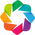

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

import cartopy
from cartopy import crs as ccrs

from bokeh.tile_providers import STAMEN_TONER
from bokeh.models import WMTSTileSource
hv.notebook_extension('bokeh')
from bokeh.io import output_file, show

In [28]:
tiles = {'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
         'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
         'Wikipedia': WMTSTileSource(url='https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png'),
         'Stamen Toner': STAMEN_TONER}
cities = pd.read_csv(r'input/cities.csv', encoding="ISO-8859-1")
population = gv.Dataset(cities, kdims=['City', 'Country', 'Year'])

ds = xr.open_dataset(r'input/znew.nc')
price = gv.Dataset(ds, kdims=['lon', 'lat'],
                             vdims=['znew'],
                             crs=ccrs.PlateCarree())

In [36]:
%%opts HeatMap [show_values=False colorbar=True]
hmap = price.to(hv.HeatMap, ['lon', 'lat'], dynamic=True)

In [47]:
%%opts Overlay [width=600 height=300] 
%%opts Points (size=0.005 cmap='viridis') [tools=['hover'] size_index=2 color_index=2 xaxis=None yaxis=None]
(price.to.image() * gv.WMTS(tiles['Wikipedia']))

# ds.redim(surface_temperature=dict(range=(300, max_surface_temp))).
#   to(gv.Image,['longitude', 'latitude'])[::2] * gf.coastline(style=dict(edgecolor='white')) 
# output_file(r'output/price.html')
 
# (gv.WMTS(tiles['Wikipedia'])*\
# population.to(gv.Points, kdims=['Longitude', 'Latitude'],
#               vdims=['Population', 'City', 'Country'], crs=ccrs.PlateCarree()))
# handle = show(plot, notebook_handle=True)
# # Update the plot title in the earlier cell
# push_notebook(handle=handle)


:Overlay
   .Image.I :Image   [lon,lat]   (znew)
   .WMTS.I  :WMTS   [Longitude,Latitude]

In [8]:
np.array(dataset)

array(['lat', 'lon', 'znew'], 
      dtype='<U4')

In [8]:
gf.coastline()

/home/o/anaconda3/lib/python3.6/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


:Feature   [Longitude,Latitude]

In [10]:
%%opts Overlay [width=600 height=400] Image (cmap='viridis') Feature (line_color='black')
# dataset = xr.open_dataset('./sample-data/pre-industrial.nc')
# dataset = xr.open_dataset(r'D:\geoviews-master\doc\assets/wrf.1981_2015.ws_multi-year.monmean_cels.nc')

# price = gv.Dataset(dataset, kdims=['XLONG', 'XLAT'],
#                              group='Air temperature', vdims=['T2'],
#                              crs=ccrs.PlateCarree())

ds = xr.open_dataset(r'input/znew.nc')
price = gv.Dataset(ds, kdims=['lon', 'lat'],
                             vdims=['znew'],
                             crs=ccrs.PlateCarree())
price.to.image() * gf.coastline()

:Overlay
   .Image.I     :Image   [lon,lat]   (znew)
   .Coastline.I :Feature   [Longitude,Latitude]

In [12]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
df_price = pd.read_csv(r'input/spb_cafe.tsv', sep='\t', na_values=['None'])
df_price = df_price.dropna(subset=['lat', 'lon'])
startlat, endlat = df_price.lat.min(), df_price.lat.max()
startlon, endlon = df_price.lon.min(), df_price.lon.max()
dlon = 0.01
dlat = 0.01
lons = np.arange(startlon, endlon, dlon)
lats = np.arange(startlat, endlat, dlat)
points = [(lat, lon) for lat, lon in zip(df_price.lat, df_price.lon)]
points1 = [(i, j) for i, j in zip(range(len(df_price.lat)), range(len(df_price.lon)))]
values = [price for price in zip(df_price['mean_price_num'])]
grid_x, grid_y = np.mgrid[startlat:dlat:endlat, startlon:dlon:endlon]
grid_x1, grid_y1 = np.mgrid[0:len(lats), 0:len(lons)]

array([], shape=(0, 0), dtype=float64)

In [34]:
print([startlat, endlat], [startlon, endlon])

[47.897970799999996, 60.195061600000002] [29.663670305836398, 33.407057699999996]


In [42]:
np.array(points1).shape, grid_x1.shape, grid_y1.shape

((373, 2), (1230, 375), (1230, 375))

In [13]:
grid_z0 = griddata(points1, values, (grid_x1, grid_y1), method='nearest')

TypeError: only integer scalar arrays can be converted to a scalar index

In [8]:
x, y = np.mgrid[startlat:endlat:0.01, startlon:endlon:dlon]
newlons = np.arange(startlon, endlon, dlon)
newlats = np.arange(startlat, endlat, dlat)

In [10]:
xnew, ynew = np.mgrid[startlat:endlat:0.001, startlon:endlon:0.001]
print(x.shape)
print(xnew.shape)

(1230, 375)
(12298, 3744)


In [11]:
ynew.shape

(12298, 3744)

In [109]:
startlat, endlat = df_price.lat.min(), df_price.lat.max()
startlat, endlatn = df_price.lon.min(), df_price.lon.max()
lons = np.arange(startlon, endlon, 0.5)
lats = np.arange(startlat, endlat, 0.5)

newlons = np.arange(startlon, endlon, 0.25)
newlats = np.arange(startlat, endlat, 0.25)
x, y = np.mgrid[startlat:endlon:0.5, startlon:endlon:0.5]
xnew, ynew = np.mgrid[startlat:endlat:0.1, startlon:endlon:0.1]
print(x.shape)
print(xnew.shape)
z = np.zeros(x.shape)
for lat, lon, price in zip(df_price['lat'], df_price['lon'], df_price['']):
    print(lat, lon, price)

ValueError: negative dimensions are not allowed

In [14]:
import numpy as np
from mpl_toolkits.basemap import Basemap
from scipy import interpolate
import matplotlib.pyplot as plt

def plot_xyz(x, y, z, xnew, ynew, plot_points, rect):
    print('\tz.mean: ', z.mean())
    tck = interpolate.bisplrep(x, y, z, s=0.85)
    znew = interpolate.bisplev(xnew[:, 0], ynew[0, :], tck)
    print('\tz.new.mean: ', znew.mean())
    plt.figure()
    pcmesh = plt.pcolormesh(xnew, ynew, znew, cmap='rainbow')
    contour = plt.contour(xnew, ynew, znew, 25, colors='black', linewidths=0.75)
    plt.clabel(contour, inline=1, fontsize=7)
    plt.colorbar(pcmesh)
    if plot_points:
        plt.scatter(plot_points[0], plot_points[1], marker='^', color='red')
        for lat, lon, name in zip(*plot_points):
            plt.annotate(name, (lat, lon))

    plt.title("Result field")
    plt.show()

def run_plot():
    startlon, endlon = 60, 70
    startlat, endlat = 50, 60

    lons = np.arange(startlon, endlon, 0.5)
    lats = np.arange(startlat, endlat, 0.5)
   
    newlons = np.arange(startlon, endlon, 0.25)
    newlats = np.arange(startlat, endlat, 0.25)
    x, y = np.mgrid[startlat:endlon:0.5, startlon:endlon:0.5]
    xnew, ynew = np.mgrid[startlat:endlat:0.1, startlon:endlon:0.1]
#     print(x.shape)
#     print(xnew.shape)
    z = np.zeros(x.shape)
    
    
#     z[z.shape[0] // 2, z.shape[1] // 2] = 89
#     z[z.shape[0] // 2 - 1, 6] = 100
#     z[z.shape[0] // 2 - 1, 7] = 80
#     z[z.shape[0] // 2 + 1, 5] = 100
#     z[z.shape[0] // 2 + 1, 6] = 100
#     z[z.shape[0] // 2 - 1, 5] = 10
#     z[-1, -1] = -30
    
    plot_points = []
    plot_xyz(x, y, z, xnew, ynew, plot_points, None)


In [15]:
run_plot()

	z.mean:  0.0
	z.new.mean:  0.0


ValueError: zero-size array to reduction operation minimum which has no identity